### Analiza danych MNIST

Zbiór MNIST zawiera 70 000 próbek pisma ręcznego, którego etykietami są cyfry 0-9. Każdy z obrazów ma 784 wartości  z zakresu 0-255 (wektor reprezentujący obrazek o wymiarach 28x28 pikseli).

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', data_home='./dane/', parser='auto')

X = mnist.data.values
target = mnist.target.values

zmienne:  (70000, 784) , etykiety:  (70000,)
etykieta target[0]:  5


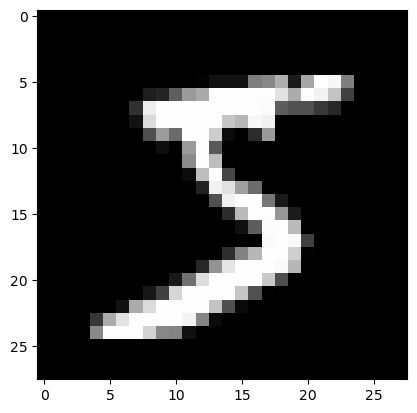

In [2]:
import matplotlib.pyplot as plt
print('zmienne: ', X.shape, ', etykiety: ', target.shape)

plt.imshow(X[0, :].reshape((28,28)), cmap='gray');
print('etykieta target[0]: ', target[0])

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

nb_samples = 2000

samples= np.random.choice(len(X),size=nb_samples)

X_rand = X[samples]
y_rand = target[samples]

s = StandardScaler()
x_std = s.fit_transform(X_rand)


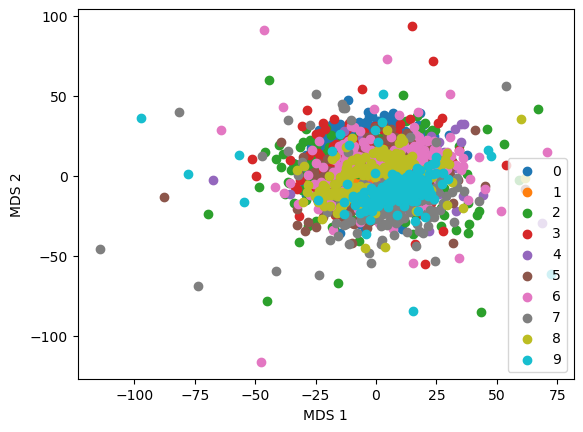

In [4]:
#MDS

from sklearn.manifold import MDS

mds = MDS(2, random_state=0, normalized_stress='auto')
projected = mds.fit_transform(x_std)

for c in np.unique(y_rand):
    plt.scatter(projected[y_rand==c, 0], projected[y_rand==c, 1], label=c)

plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.legend(loc='lower right')
plt.show()

(2000, 2)


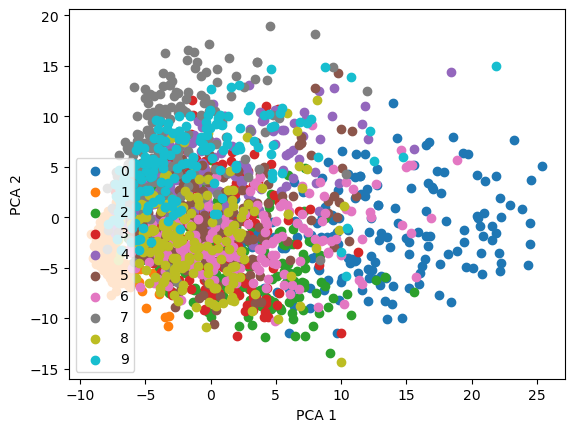

In [5]:
#PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_std_pca = pca.fit_transform(x_std)
print(X_std_pca.shape)

for c in np.unique(y_rand):
    plt.scatter(X_std_pca[y_rand==c, 0], X_std_pca[y_rand==c, 1], label=c)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='lower left')
plt.show()

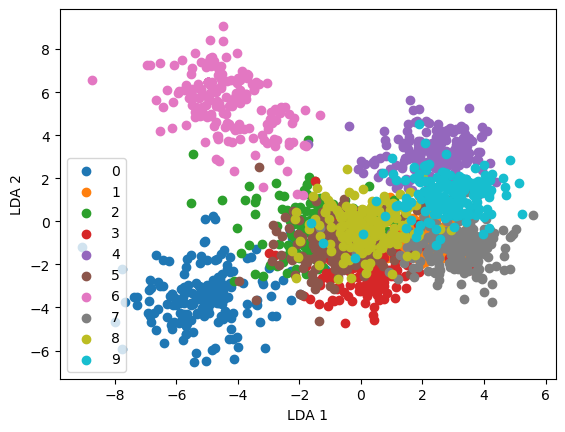

In [6]:
#LDA 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%matplotlib inline
lda = LDA(n_components=2)
X_lda = lda.fit_transform(x_std, y_rand)

for c in np.unique(y_rand):
    plt.scatter(X_lda[y_rand==c, 0], X_lda[ y_rand==c, 1], label=c)

plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.legend(loc='lower left')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=10000)

s = StandardScaler()
X_train_std = s.fit_transform(X_train)

pca = PCA(n_components=55, whiten=True)
X_train_pca = pca.fit_transform(X_train_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs',max_iter=1000) 
lr = lr.fit(X_train_pca, y_train)

In [10]:
from sklearn.metrics import classification_report

X_test_std = s.transform(X_test)
X_test_pca = pca.transform(X_test_std)
y_pred = lr.predict(X_test_pca)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1009
           1       0.92      0.98      0.95      1136
           2       0.91      0.89      0.90      1004
           3       0.86      0.86      0.86       999
           4       0.91      0.90      0.90      1024
           5       0.85      0.82      0.84       868
           6       0.95      0.94      0.94       972
           7       0.91      0.91      0.91       984
           8       0.84      0.81      0.83       998
           9       0.86      0.87      0.87      1006

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

